In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import ensemble

In [2]:
h = pd.read_csv('E.csv',
                index_col='TIME',parse_dates=['TIME'])
df = pd.DataFrame(h)
df.index.names = [None]

In [3]:
df = pd.DataFrame(h)
display(df.head())
display(df.tail())

,OPEN,HIGH,LOW,CLOSE
2019-09-02 11:17:00,1.09804,1.09825,1.09803,1.09824
2019-09-02 11:18:00,1.09824,1.09840,1.09819,1.09834
2019-09-02 11:19:00,1.09834,1.09837,1.09800,1.09802
2019-09-02 11:20:00,1.09802,1.09805,1.09798,1.09803
2019-09-02 11:21:00,1.09803,1.09803,1.09795,1.09798


,OPEN,HIGH,LOW,CLOSE
2019-09-19 02:43:00,1.10293,1.10295,1.10293,1.10295
2019-09-19 02:44:00,1.10295,1.10295,1.10293,1.10293
2019-09-19 02:45:00,1.10293,1.10295,1.10290,1.10295
2019-09-19 02:46:00,1.10295,1.10296,1.10294,1.10294
2019-09-19 02:47:00,1.10294,1.10297,1.10294,1.10295


,OPEN,HIGH,LOW,CLOSE,return
2019-09-02 11:17:00,1.09804,1.09825,1.09803,1.09824,-0.00020
2019-09-02 11:18:00,1.09824,1.09840,1.09819,1.09834,-0.00010
2019-09-02 11:19:00,1.09834,1.09837,1.09800,1.09802,0.00032
2019-09-02 11:20:00,1.09802,1.09805,1.09798,1.09803,-0.00001
2019-09-02 11:21:00,1.09803,1.09803,1.09795,1.09798,0.00005
...,...,...,...,...,...
2019-09-19 02:43:00,1.10293,1.10295,1.10293,1.10295,-0.00002
2019-09-19 02:44:00,1.10295,1.10295,1.10293,1.10293,0.00002
2019-09-19 02:45:00,1.10293,1.10295,1.10290,1.10295,-0.00002
2019-09-19 02:46:00,1.10295,1.10296,1.10294,1.10294,0.00001


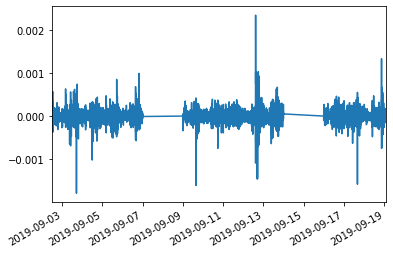

In [4]:
# Create return (open-close) normalized



df['return'] = df['OPEN'] - df['CLOSE']


# If return > 0, green; otherwise, red

df['return'].plot()
df

In [5]:
# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp
# ****************** consider when return ==0 next version

df['UP/DOWN'] = df['return'].apply(lambda x: 1 if x>0.0 else 0)
df.tail(10)

,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN
2019-09-19 02:38:00,1.10295,1.10296,1.10293,1.10295,0.00000,0
2019-09-19 02:39:00,1.10295,1.10298,1.10295,1.10295,0.00000,0
2019-09-19 02:40:00,1.10295,1.10296,1.10293,1.10295,0.00000,0
2019-09-19 02:41:00,1.10295,1.10298,1.10294,1.10295,0.00000,0
2019-09-19 02:42:00,1.10295,1.10295,1.10293,1.10293,0.00002,1
2019-09-19 02:43:00,1.10293,1.10295,1.10293,1.10295,-0.00002,0
2019-09-19 02:44:00,1.10295,1.10295,1.10293,1.10293,0.00002,1
2019-09-19 02:45:00,1.10293,1.10295,1.10290,1.10295,-0.00002,0
2019-09-19 02:46:00,1.10295,1.10296,1.10294,1.10294,0.00001,1
2019-09-19 02:47:00,1.10294,1.10297,1.10294,1.10295,-0.00001,0


In [6]:
df.dtypes
##df = df.loc[:,['OPEN', 'HIGH', 'LOW', 'CLOSE', 'return','UP/DOWN']]
df.tail()

,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN
2019-09-19 02:43:00,1.10293,1.10295,1.10293,1.10295,-0.00002,0
2019-09-19 02:44:00,1.10295,1.10295,1.10293,1.10293,0.00002,1
2019-09-19 02:45:00,1.10293,1.10295,1.10290,1.10295,-0.00002,0
2019-09-19 02:46:00,1.10295,1.10296,1.10294,1.10294,0.00001,1
2019-09-19 02:47:00,1.10294,1.10297,1.10294,1.10295,-0.00001,0


In [15]:
# Creating datetime features


df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

df['hour'] = df.index.hour
df['min'] = df.index.minute
df['sec'] = df.index.second
df.head()

,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN,year,month,day,hour,min,sec
2019-09-02 11:17:00,1.09804,1.09825,1.09803,1.09824,-0.00020,0,2019,9,2,11,17,0
2019-09-02 11:18:00,1.09824,1.09840,1.09819,1.09834,-0.00010,0,2019,9,2,11,18,0
2019-09-02 11:19:00,1.09834,1.09837,1.09800,1.09802,0.00032,1,2019,9,2,11,19,0
2019-09-02 11:20:00,1.09802,1.09805,1.09798,1.09803,-0.00001,0,2019,9,2,11,20,0
2019-09-02 11:21:00,1.09803,1.09803,1.09795,1.09798,0.00005,1,2019,9,2,11,21,0


In [17]:
# Make training and test dataset

df_test = df.loc['2019.09.02' ,:]  
display(df_test.head())
display(df_test.tail())

df_train = df.loc[:'2019.10.11',:] 
display(df_train.head())
display(df_train.tail())

,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN,year,month,day,hour,min,sec
2019-09-02 11:17:00,1.09804,1.09825,1.09803,1.09824,-0.00020,0,2019,9,2,11,17,0
2019-09-02 11:18:00,1.09824,1.09840,1.09819,1.09834,-0.00010,0,2019,9,2,11,18,0
2019-09-02 11:19:00,1.09834,1.09837,1.09800,1.09802,0.00032,1,2019,9,2,11,19,0
2019-09-02 11:20:00,1.09802,1.09805,1.09798,1.09803,-0.00001,0,2019,9,2,11,20,0
2019-09-02 11:21:00,1.09803,1.09803,1.09795,1.09798,0.00005,1,2019,9,2,11,21,0


,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN,year,month,day,hour,min,sec
2019-09-02 23:55:00,1.09687,1.09692,1.09660,1.09692,-0.00005,0,2019,9,2,23,55,0
2019-09-02 23:56:00,1.09696,1.09705,1.09678,1.09680,0.00016,1,2019,9,2,23,56,0
2019-09-02 23:57:00,1.09688,1.09689,1.09675,1.09675,0.00013,1,2019,9,2,23,57,0
2019-09-02 23:58:00,1.09682,1.09694,1.09682,1.09694,-0.00012,0,2019,9,2,23,58,0
2019-09-02 23:59:00,1.09688,1.09696,1.09687,1.09696,-0.00008,0,2019,9,2,23,59,0


,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN,year,month,day,hour,min,sec
2019-09-02 11:17:00,1.09804,1.09825,1.09803,1.09824,-0.00020,0,2019,9,2,11,17,0
2019-09-02 11:18:00,1.09824,1.09840,1.09819,1.09834,-0.00010,0,2019,9,2,11,18,0
2019-09-02 11:19:00,1.09834,1.09837,1.09800,1.09802,0.00032,1,2019,9,2,11,19,0
2019-09-02 11:20:00,1.09802,1.09805,1.09798,1.09803,-0.00001,0,2019,9,2,11,20,0
2019-09-02 11:21:00,1.09803,1.09803,1.09795,1.09798,0.00005,1,2019,9,2,11,21,0


,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN,year,month,day,hour,min,sec
2019-09-19 02:43:00,1.10293,1.10295,1.10293,1.10295,-0.00002,0,2019,9,19,2,43,0
2019-09-19 02:44:00,1.10295,1.10295,1.10293,1.10293,0.00002,1,2019,9,19,2,44,0
2019-09-19 02:45:00,1.10293,1.10295,1.10290,1.10295,-0.00002,0,2019,9,19,2,45,0
2019-09-19 02:46:00,1.10295,1.10296,1.10294,1.10294,0.00001,1,2019,9,19,2,46,0
2019-09-19 02:47:00,1.10294,1.10297,1.10294,1.10295,-0.00001,0,2019,9,19,2,47,0


In [11]:
df_train.columns

Index(['OPEN', 'HIGH ', 'LOW ', 'CLOSE', 'return', 'UP/DOWN', 'year', 'month',
       'day', 'hour', 'min'],
      dtype='object')

In [18]:
# Separate features and output

y_train = df_train['UP/DOWN']
X_train = df_train.loc[:,['OPEN','HIGH ','LOW ','CLOSE','return']]

y_test = df_test['UP/DOWN']
X_test = df_test.loc[:,['OPEN','HIGH ','LOW ','CLOSE','return']]
    

In [19]:
print(X_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == 0)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

(763, 5)
(763,)
% of Class0 : 0.606815 y_test
% of Class1 : 0.393185 y_test


In [20]:
print(X_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(18204, 5)
(18204,)
% of Class0 : 0.558613 y_train
% of Class1 : 0.441387 y_train


In [21]:
# Define Model and fit


clf = ensemble.GradientBoostingClassifier(verbose=3)

clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1825            0.59s
         2           1.0277            0.64s
         3           0.8991            0.78s
         4           0.7905            0.84s
         5           0.6979            0.82s
         6           0.6181            0.78s
         7           0.5490            0.74s
         8           0.4888            0.73s
         9           0.4360            0.70s
        10           0.3896            0.68s
        11           0.3486            0.65s
        12           0.3123            0.62s
        13           0.2801            0.64s
        14           0.2515            0.61s
        15           0.2259            0.60s
        16           0.2032            0.60s
        17           0.1828            0.59s
        18           0.1646            0.57s
        19           0.1482            0.55s
        20           0.1336            0.56s
        21           0.1204            0.55s
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=3,
                           warm_start=False)

## How accurate is this model?



In [22]:
accuracy = clf.score(X_train, y_train)
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 1.000000


In [23]:
pred = clf.predict(X_test)

In [24]:
df_trade = pd.DataFrame(X_test)
df_trade['UP/DOWN']  = y_test
df_trade['pred']   = pred
df_trade['won']    = df_trade['UP/DOWN'] == df_trade['pred']

df_trade

,OPEN,HIGH,LOW,CLOSE,return,UP/DOWN,pred,won
2019-09-02 11:17:00,1.09804,1.09825,1.09803,1.09824,-0.00020,0,0,True
2019-09-02 11:18:00,1.09824,1.09840,1.09819,1.09834,-0.00010,0,0,True
2019-09-02 11:19:00,1.09834,1.09837,1.09800,1.09802,0.00032,1,1,True
2019-09-02 11:20:00,1.09802,1.09805,1.09798,1.09803,-0.00001,0,0,True
2019-09-02 11:21:00,1.09803,1.09803,1.09795,1.09798,0.00005,1,1,True
...,...,...,...,...,...,...,...,...
2019-09-02 23:55:00,1.09687,1.09692,1.09660,1.09692,-0.00005,0,0,True
2019-09-02 23:56:00,1.09696,1.09705,1.09678,1.09680,0.00016,1,1,True
2019-09-02 23:57:00,1.09688,1.09689,1.09675,1.09675,0.00013,1,1,True
2019-09-02 23:58:00,1.09682,1.09694,1.09682,1.09694,-0.00012,0,0,True


In [25]:
# Didnt won and won

print(df_trade[df_trade['won'] == False]['won'].count())
print(df_trade[df_trade['won'] == True]['won'].count())

0
763


In [26]:
# % of won

df_trade[df_trade['won'] == True]['won'].count()/df_trade['won'].count()

1.0